In [30]:
# from helper import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os
import sys
sys.path.append(os.path.abspath(os.path.join('../scripts')))
from helper import TelecomHelper
from plots import *


In [6]:
Helper = TelecomHelper()

In [12]:
cleaned_df = Helper.read_csv(data='../data/cleaned_data.csv', missing_values=["n/a", "na", "undefined"])

file read as csv


In [13]:
sessions = cleaned_df.groupby('msisdn/number').agg({'bearer_id': 'count'})
sessions = sessions.rename(columns= {'bearer_id': 'xDR_sessions'})
sessions.sort_values(by=['xDR_sessions'], ascending = False).head(10)

,xDR_sessions
msisdn/number,
3.362632e+10,18
3.361489e+10,17
3.362578e+10,17
3.365973e+10,16
3.367588e+10,15
3.376054e+10,15
3.366716e+10,13
3.360313e+10,12
3.376041e+10,12


In [14]:
sessions.describe()

,xDR_sessions
count,105719.000000
mean,1.389447
std,0.796173
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,18.000000


In [15]:
print(f"percent missing for dur._(ms) is:{Helper.percent_missing_for_col(cleaned_df, 'dur._(ms)')}")

percent missing for dur._(ms) is:0.0


In [16]:
# we group the data using  msisdn (customer number) and find sum the the duration for each customer

durations = cleaned_df.groupby('msisdn/number').agg({'dur._(ms)': 'sum'})


durations=durations.rename(columns= {'dur._(ms)': 'total_duration(ms)'})
durations.sort_values(by=['total_duration(ms)'], ascending = False).head(10)

,total_duration(ms)
msisdn/number,
3.362578e+10,18553754.0
3.361489e+10,9966898.0
3.376054e+10,9279434.0
3.362632e+10,8791927.0
3.366716e+10,8744914.0
3.366469e+10,6288730.0
3.360313e+10,6287761.0
3.366746e+10,5649882.0
3.376041e+10,5321667.0


In [17]:
durations.describe()

,total_duration(ms)
count,1.057190e+05
mean,1.462114e+05
std,1.845391e+05
min,7.142000e+03
25%,7.272900e+04
50%,1.031110e+05
75%,1.727990e+05
max,1.855375e+07


In [18]:
total_data_df = cleaned_df[['msisdn/number','total_ul_(bytes)','total_dl_(bytes)']].copy()
total_data_df = total_data_df.groupby('msisdn/number').sum()
total_data_df['total_data(bytes)'] = total_data_df['total_ul_(bytes)'] + total_data_df['total_dl_(bytes)']
total_data_df.sort_values(by=['total_data(bytes)'], ascending = False).head(10)

,total_ul_(bytes),total_dl_(bytes),total_data(bytes)
msisdn/number,,,
3.361489e+10,689483001.0,8.156743e+09,8.846226e+09
3.376054e+10,703478581.0,7.811295e+09,8.514774e+09
3.362578e+10,729577380.0,7.770043e+09,8.499621e+09
3.362632e+10,669650721.0,7.301517e+09,7.971167e+09
3.367588e+10,581568792.0,7.309542e+09,7.891111e+09
3.365973e+10,624260321.0,7.081602e+09,7.705863e+09
3.366646e+10,405060976.0,6.903440e+09,7.308501e+09
3.376041e+10,521518890.0,6.610852e+09,7.132371e+09
3.366471e+10,471244453.0,6.400774e+09,6.872018e+09


In [19]:
total_data_df.describe()

,total_ul_(bytes),total_dl_(bytes),total_data(bytes)
count,1.057190e+05,1.057190e+05,1.057190e+05
mean,5.713601e+07,6.317300e+08,6.888661e+08
std,3.527180e+07,4.609209e+08,4.869964e+08
min,2.866892e+06,8.827082e+06,3.324901e+07
25%,3.637849e+07,3.142406e+08,3.579501e+08
50%,4.676298e+07,5.693797e+08,6.169335e+08
75%,6.550410e+07,8.062981e+08,8.564738e+08
max,7.295774e+08,8.156743e+09,8.846226e+09


In [20]:
cleaned_df["social_media"] = cleaned_df["social_media_dl_(bytes)"] + cleaned_df['social_media_ul_(bytes)']
cleaned_df["google"] = cleaned_df["google_dl_(bytes)"] + cleaned_df["google_ul_(bytes)"]
cleaned_df['email'] = cleaned_df["email_dl_(bytes)"] + cleaned_df["email_ul_(bytes)"]
cleaned_df['youtube'] = cleaned_df["youtube_dl_(bytes)"] + cleaned_df["youtube_ul_(bytes)"]
cleaned_df['netflix'] = cleaned_df["netflix_dl_(bytes)"] + cleaned_df["netflix_ul_(bytes)"]
cleaned_df["gaming"] = cleaned_df["gaming_dl_(bytes)"] + cleaned_df["gaming_ul_(bytes)"]
cleaned_df['other']= cleaned_df["other_dl_(bytes)"]+ cleaned_df["other_ul_(bytes)"]
cleaned_df['total_data'] = cleaned_df['total_dl_(bytes)'] + cleaned_df['total_ul_(bytes)']

In [21]:
app_total_data = cleaned_df[['msisdn/number','social_media','google',
                             'email', 'youtube','netflix', 'gaming','other']].copy()

In [22]:
app_total_data.groupby('msisdn/number').sum().sample(10)

,social_media,google,email,youtube,netflix,gaming,other
msisdn/number,,,,,,,
3.366113e+10,4293838.0,12585455.0,5064156.0,53071015.0,27512396.0,1.219409e+09,1.054699e+09
3.366187e+10,1669875.0,15094340.0,7237356.0,38605744.0,63706380.0,8.619822e+08,1.064574e+09
3.365815e+10,890670.0,8325302.0,2868754.0,42948626.0,21151740.0,1.799747e+07,3.633396e+08
3.378383e+10,5720146.0,28573320.0,7830745.0,48287050.0,68408143.0,8.710071e+08,9.973134e+08
3.366840e+10,2392541.0,4842077.0,3734029.0,34174940.0,21645894.0,7.635363e+08,3.963708e+08
3.366469e+10,3312965.0,12666635.0,6129632.0,50049861.0,54338254.0,9.693595e+08,7.099997e+08
3.366975e+10,2248048.0,4098831.0,3510852.0,29014930.0,22762264.0,8.338553e+08,7.589846e+08
3.361664e+10,2040245.0,11238262.0,1193848.0,12924265.0,16406389.0,4.501813e+08,4.207481e+08
3.366278e+10,1687902.0,20925005.0,6658491.0,41638821.0,43240604.0,3.596920e+08,9.689081e+08


In [23]:
app_total_data.describe()

,msisdn/number,social_media,google,email,youtube,netflix,gaming,other
count,1.468910e+05,1.468910e+05,1.468910e+05,1.468910e+05,1.468910e+05,1.468910e+05,1.468910e+05,1.468910e+05
mean,3.596855e+10,1.827740e+06,7.807978e+06,2.259078e+06,2.264199e+07,2.262936e+07,4.303551e+08,4.292667e+08
std,8.792026e+11,1.035571e+06,3.517121e+06,1.071128e+06,9.244557e+06,9.259223e+06,2.440902e+08,2.432095e+08
min,3.360100e+10,1.563000e+03,4.033000e+04,8.359000e+03,1.296550e+05,9.843200e+04,3.063580e+05,1.490450e+05
25%,3.365128e+10,9.313390e+05,4.943585e+06,1.359012e+06,1.599734e+07,1.598200e+07,2.186982e+08,2.184706e+08
50%,3.366369e+10,1.825390e+06,7.815399e+06,2.263843e+06,2.266341e+07,2.263459e+07,4.316651e+08,4.297978e+08
75%,3.368344e+10,2.727156e+06,1.068314e+07,3.159587e+06,2.929342e+07,2.928815e+07,6.415728e+08,6.396656e+08
max,3.370000e+14,3.650861e+06,1.552878e+07,4.518036e+06,4.519008e+07,4.519815e+07,8.592028e+08,8.595209e+08


In [24]:


explore_feature_df = cleaned_df[['msisdn/number', 'last_location_name',
                                 'handset_manufacturer', 'handset_type', 'dur._(ms)', 
                                 'social_media', 'google', 'email', 'youtube', 'netflix',
                                 'gaming','other', 'total_data'
                                ]]
explore_feature_df = explore_feature_df.rename(columns={'other':'other_data','msisdn/number': 'msisdn', 'last_location_name': 'location','dur._(ms)': 'duration_ms' })



In [25]:
explore_feature_df.head()

,msisdn,location,handset_manufacturer,handset_type,duration_ms,social_media,google,email,youtube,netflix,gaming,other_data,total_data
0,3.366496e+10,9164566995485190,Samsung,Samsung Galaxy A5 Sm-A520F,1823652.0,1570185.0,2905912.0,3701304.0,18355943.0,17855187.0,292426453.0,180558843.0,345629377.0
1,3.368185e+10,L77566A,Samsung,Samsung Galaxy J5 (Sm-J530),1365104.0,1933278.0,4414096.0,937385.0,39359124.0,35565545.0,609920783.0,541959383.0,707185356.0
2,3.376063e+10,D42335A,Samsung,Samsung Galaxy A8 (2018),1361762.0,1726277.0,10229119.0,3363124.0,34425237.0,23751202.0,229980251.0,414908351.0,307690973.0
3,3.375034e+10,T21824A,undefined,undefined,1321509.0,657493.0,11811761.0,2070983.0,36534765.0,15092588.0,810387875.0,761837216.0,889352748.0
4,3.369980e+10,D88865A,Samsung,Samsung Sm-G390F,1089009.0,912788.0,7748843.0,2110349.0,34222253.0,17539799.0,531237049.0,564619822.0,607681403.0


In [26]:
def convert_bytes_to_megabytes(df, bytes_data):

        megabyte = 1*10e+5
        megabyte_col = df[bytes_data] / megabyte

        return megabyte_col

In [27]:


explore_feature_df['social_media'] = convert_bytes_to_megabytes(explore_feature_df, 'social_media')

explore_feature_df['google'] = convert_bytes_to_megabytes(explore_feature_df, 'google')

explore_feature_df['email'] = convert_bytes_to_megabytes(explore_feature_df, 'email')

explore_feature_df['youtube'] = convert_bytes_to_megabytes(explore_feature_df, 'youtube')

explore_feature_df['netflix'] = convert_bytes_to_megabytes(explore_feature_df, 'netflix')

explore_feature_df['gaming'] = convert_bytes_to_megabytes(explore_feature_df, 'gaming')

explore_feature_df['total_data'] = convert_bytes_to_megabytes(explore_feature_df, 'total_data')

explore_feature_df['other_data'] = convert_bytes_to_megabytes(explore_feature_df, 'other_data')


In [28]:
quntitative_df = explore_feature_df[['duration_ms', 'social_media', 'google', 'email', 'youtube', 'netflix',
                                 'gaming', 'total_data', 'other_data' ]]

In [29]:
quntitative_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
duration_ms,146891.0,105229.880394,80924.455397,7142.000000,58527.000000,86399.000000,133154.500000,1.859336e+06
social_media,146891.0,1.827740,1.035571,0.001563,0.931339,1.825390,2.727156,3.650861e+00
google,146891.0,7.807978,3.517121,0.040330,4.943585,7.815399,10.683145,1.552878e+01
email,146891.0,2.259078,1.071128,0.008359,1.359012,2.263843,3.159587,4.518036e+00
youtube,146891.0,22.641990,9.244557,0.129655,15.997340,22.663408,29.293419,4.519008e+01
netflix,146891.0,22.629360,9.259223,0.098432,15.981996,22.634588,29.288154,4.519815e+01
gaming,146891.0,430.355126,244.090217,0.306358,218.698198,431.665078,641.572846,8.592028e+02
total_data,146891.0,495.784159,244.441632,28.956107,284.485028,496.924346,706.637913,9.559848e+02
other_data,146891.0,429.266672,243.209547,0.149045,218.470640,429.797759,639.665594,8.595209e+02


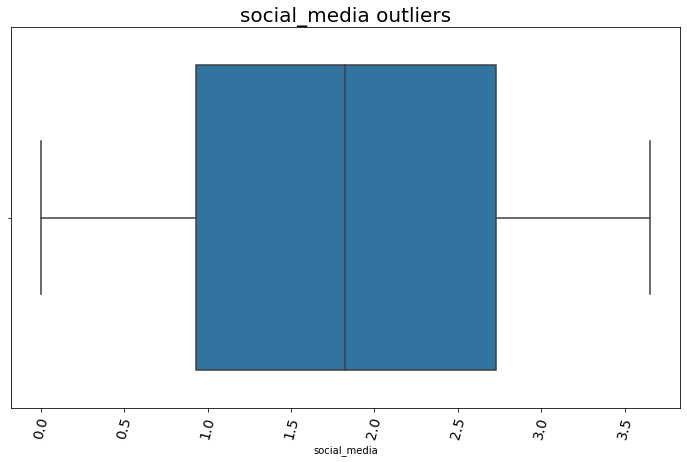

In [32]:
plot_box(quntitative_df,"social_media", "social_media outliers")

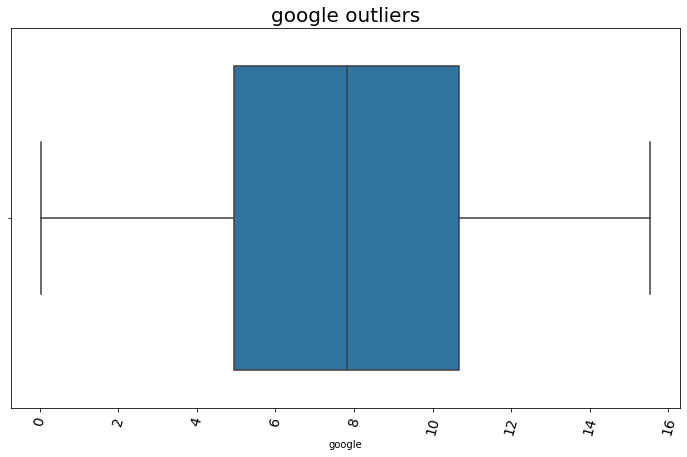

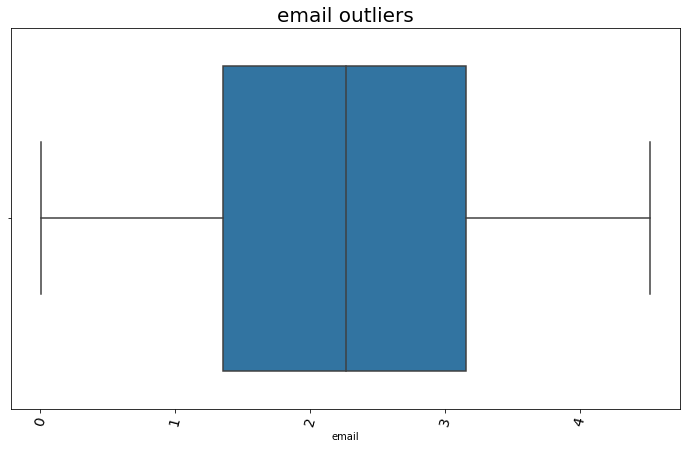

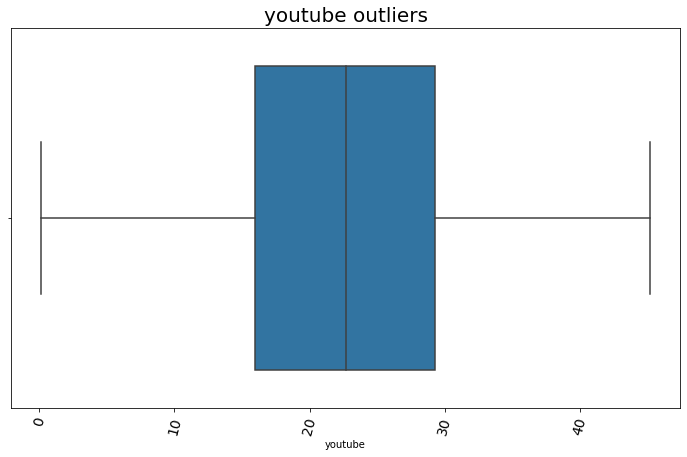

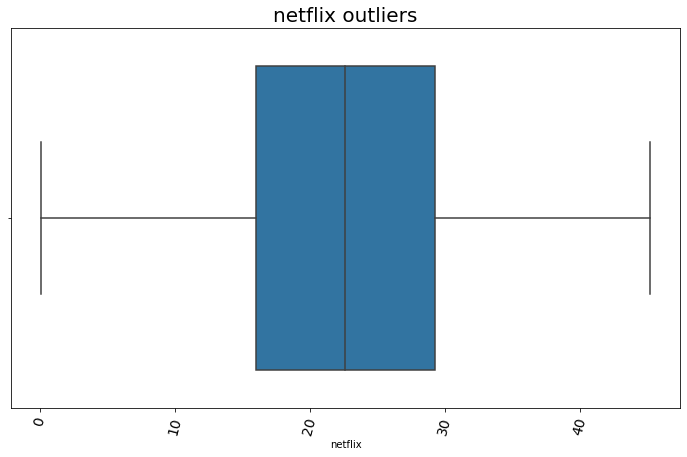

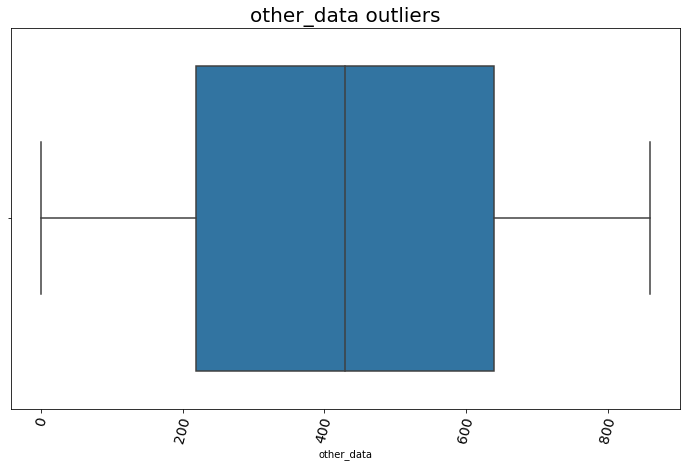

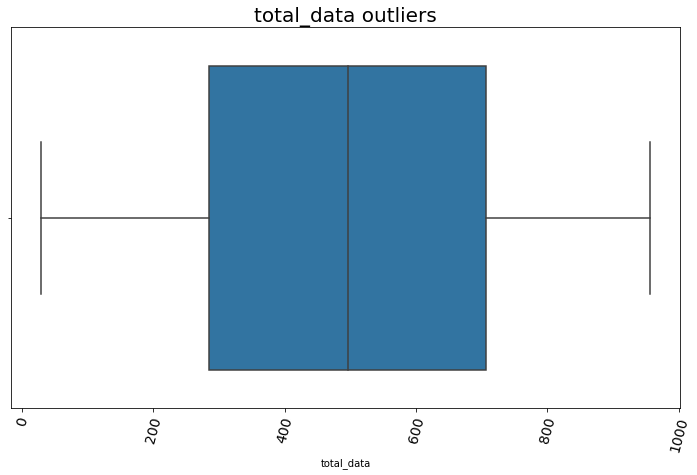

In [34]:
plot_box(quntitative_df, "google", "google outliers")

plot_box(quntitative_df, "email", "email outliers"  )

plot_box(quntitative_df, "youtube", "youtube outliers")

plot_box(quntitative_df, "netflix", "netflix outliers")

plot_box(quntitative_df, "other_data", "other_data outliers")

plot_box(quntitative_df, "total_data", "total_data outliers")


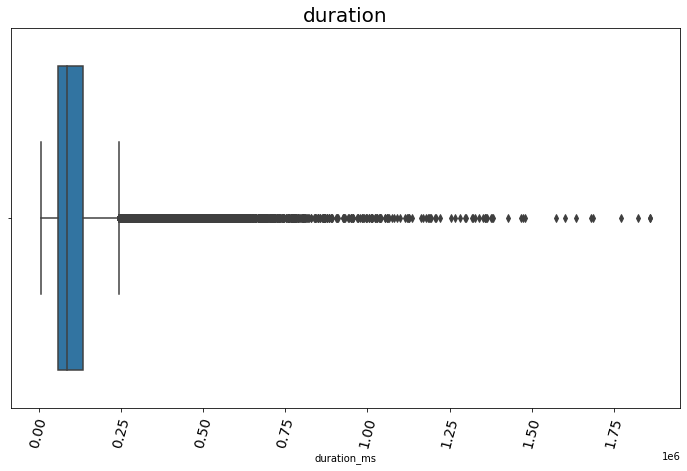

In [35]:
plot_box(quntitative_df, "duration_ms", "duration")


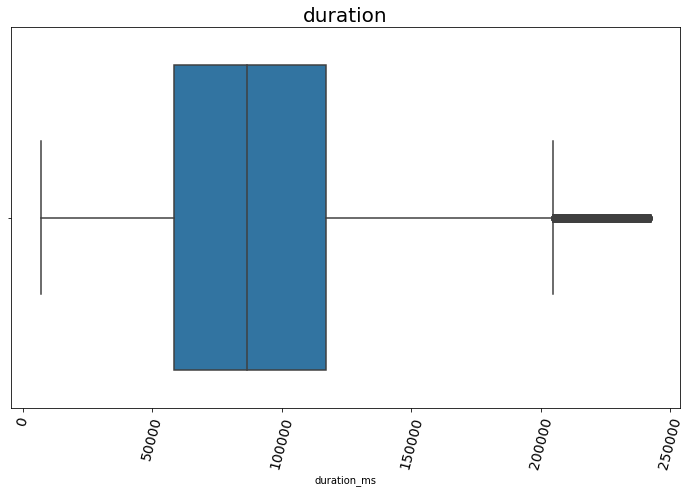

In [36]:

quntitative_df['duration_ms'] = np.where(quntitative_df['duration_ms'] > quntitative_df['duration_ms'].quantile(0.95),
                                         quntitative_df['duration_ms'].mode(),quntitative_df['duration_ms'])
plot_box(quntitative_df, "duration_ms", "duration")


<Figure size 648x504 with 0 Axes>

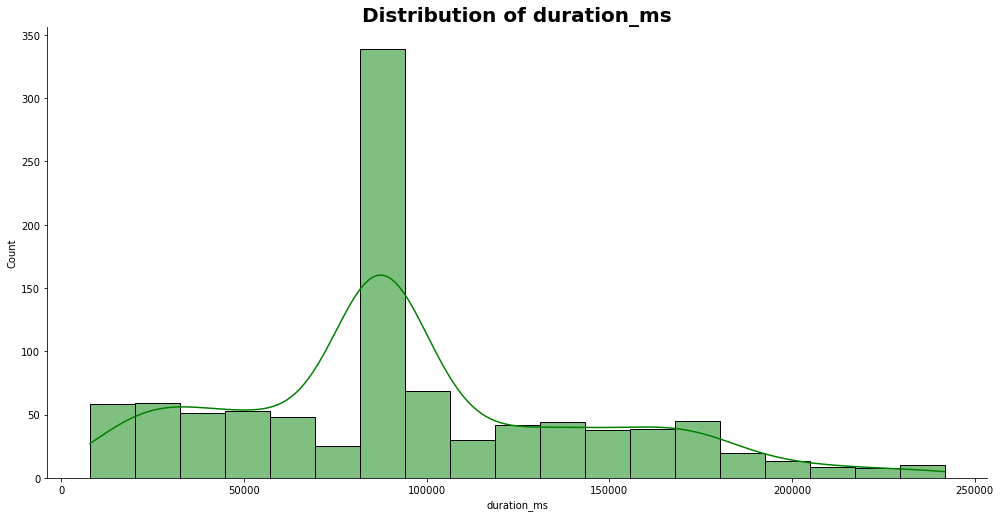

<Figure size 648x504 with 0 Axes>

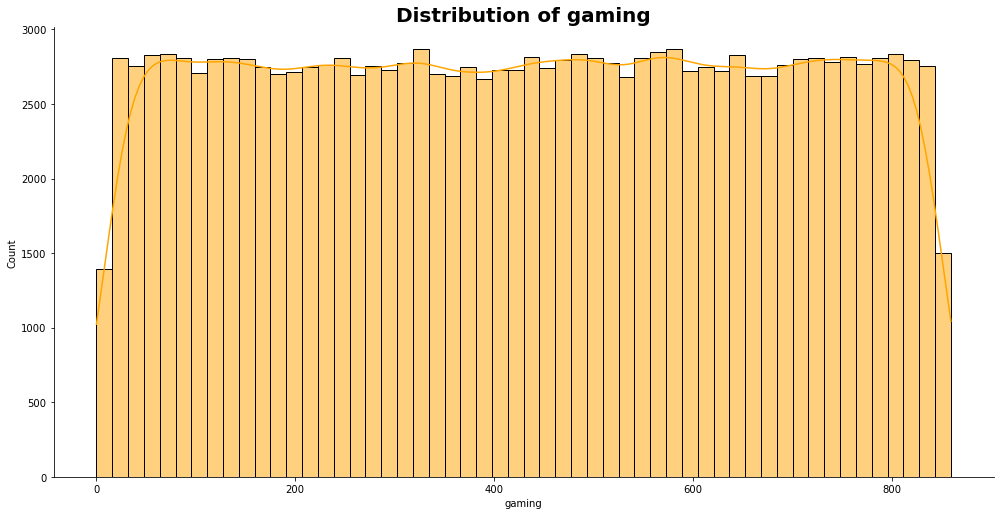

<Figure size 648x504 with 0 Axes>

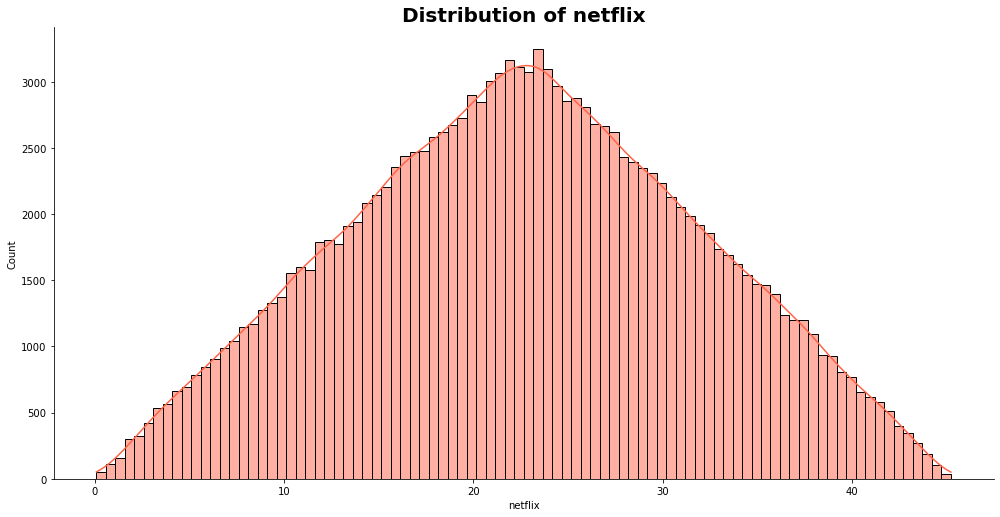

<Figure size 648x504 with 0 Axes>

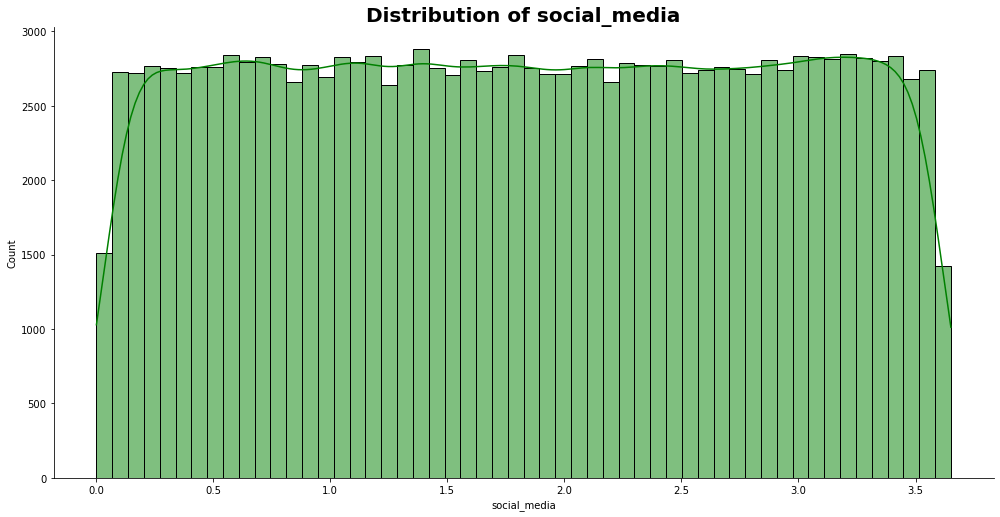

In [38]:
plot_hist(quntitative_df.sample(1000), 'duration_ms', color='green')

plot_hist(quntitative_df, 'gaming', color='orange')

plot_hist(quntitative_df, 'netflix', color='tomato')

plot_hist(quntitative_df, 'social_media', color='green')




In [41]:
%load overViewAnal 

ValueError: 'overViewAnal' was not found in history, as a file, url, nor in the user namespace.

In [39]:
top_manfacturers = overViewAnal.top_manufacturer(top=5).index[:5].to_list()
filter_row = explore_feature_df['handset_manufacturer'].isin(top_manfacturers)

count_df = explore_feature_df[filter_row]
plot_count(count_df, 'handset_manufacturer')



# plot_count(explore_feature_df[explore_feature_df['handset_manufacturer'].isin(overViewAnal.top_manufacturer(top=3)._to_list())], 'handset_manufacturer')



NameError: name 'overViewAnal' is not defined